# 2. Programming practice. Basics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import bivariate_normal
from sklearn import svm

np.random.seed(25)

## 2.1. Multivariate Gaussian (normal) distribution.

### 2.1.1. Plot a sample X of 100 points from a 2D Gaussian distribution with zero mean and unit variance.

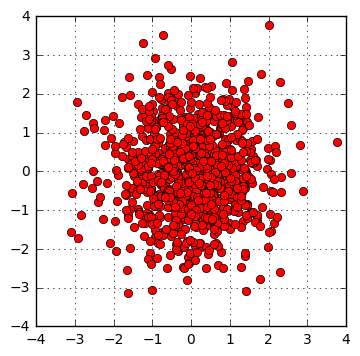

In [2]:
num_points = 1000

mean = [0, 0] #mean - 0
cov = [[1, 0], [0, 1]] #covariance matrix
X = np.random.multivariate_normal(mean, cov, size=num_points).T
x, y = X

fig = plt.figure()
plt.plot(x, y, 'ro')
plt.axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

*** 
### 2.1.2. Compute the correlation coefficient between the X1 and X2 coordinates in the above sample. Are X1 and X2 correlated?

In [3]:
corr_coef = np.corrcoef(x, y)
print ("Correlation coefficients: \n {}".format(corr_coef))

Correlation coefficients: 
 [[ 1.         -0.00425988]
 [-0.00425988  1.        ]]


The correlation coefficient (of the main diagonal) shows that x and y are not correlated.

***
### 2.1.3. Generate a random 2D vector mu and a random 2-by-2 matrix A. Plot Z = mu + A * X and compute the correlation coefficient between Z1 and Z2. Are Z1 and Z2 correlated?

In [4]:
mu = np.random.rand(2, num_points) # 2x100
A = np.random.rand(2, 2) # 2x2
Z = mu + np.dot(A, X) # 2x100

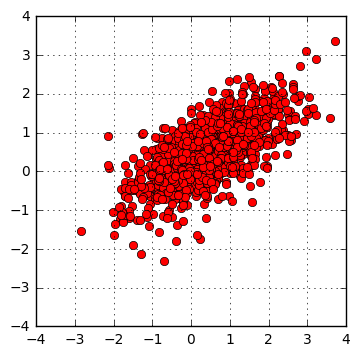

Correlation coefficients: 
 [[ 1.          0.67561791]
 [ 0.67561791  1.        ]]


In [5]:
x_z, y_z = Z #new points

plt.plot(x_z, y_z, 'ro')
plt.axis([-4, 4, -4, 4])
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

corr_coef = np.corrcoef(x_z, y_z)
print ("Correlation coefficients: \n {}".format(corr_coef))

The correlation coefficient (of the main diagonal) shows that x and y are correlated.

***
### 2.1.4. Compute the sample covariance matrices of X and Z. What can you say about them?

In [6]:
X_cov = np.cov(X)
print ("Covariance matrix for X:\n{}\n".format(X_cov))
Z_cov = np.cov(Z)
print ("Covariance matrix for Z:\n{}".format(Z_cov))

Covariance matrix for X:
[[ 0.945895   -0.00441807]
 [-0.00441807  1.1371748 ]]

Covariance matrix for Z:
[[ 1.06690818  0.54910937]
 [ 0.54910937  0.61913928]]


#### Let SZ be the sample covariance matrix of Z and let B = A * A'. Compute the distance between SZ and B in Frobenius norm.

In [7]:
B = np.dot(A, A.T) # B = A * A'
dist = np.linalg.norm(Z_cov-B)
print(B)
print("Distance between Z_cov and B: {}".format(dist))

[[ 0.86791456  0.49613911]
 [ 0.49613911  0.52787175]]
Distance between Z_cov and B: 0.23138694178112393


As we increase the number of points we observe that Z_cov approaches the true covariance matrix B.

***
### 2.1.5. Same as 2.1.1.--2.1.3., but in 3D

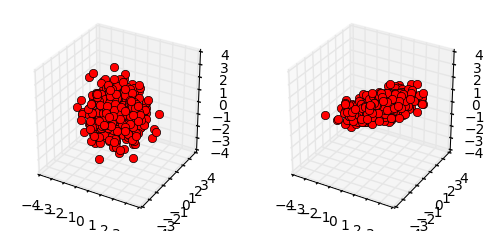

In [8]:
num_points = 500
dim = 3

mean = np.zeros(dim) #mean
cov = np.identity(dim) #covariance matrix
X = np.random.multivariate_normal(mean, cov, size=num_points).T

mu = np.random.rand(dim, num_points)
A = np.random.rand(dim, dim)
Z = mu + np.dot(A, X)

x, y, z = X
plt.subplot(121, projection='3d')
plt.plot(x, y, z,'ro')
plt.axis([-4, 4, -4, 4])
plt.gca().set_zlim3d(-4, 4)
plt.gca().set_aspect('equal')
plt.grid()

x, y, z = Z
plt.subplot(122, projection='3d')
plt.plot(x, y, z,'ro')
plt.axis([-4, 4, -4, 4])
plt.gca().set_zlim3d(-4, 4)
plt.gca().set_aspect('equal')
plt.grid()

plt.show()

***
### 2.1.6 3D plot of a bivaruate distribution

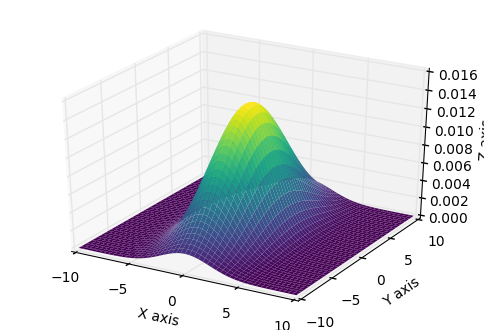

In [9]:
mu_x = 0
sigma_x = np.sqrt(5)

mu_y = 0
sigma_y = np.sqrt(25)

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y, sigma_x, sigma_y, mu_x, mu_y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis', linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

***
## 2.2. The Perceptron algorithm.

###  2.2.1. Let the dimension d = 2. Generate two random vectors in R^d, mu1 and mu2, and two square random matrices S1 and S2. Let mu1 = mu1 - 1 and mu2 = mu2 + 1, where operations are done componentwise. Write a function with the following signature, get_random_sample(n, mu1, mu2, S1, S2), which returns a tuple (X, Y), where X is a random sample of length 2n with:
#### (i) the first n points generated according to the Gaussian distribution N(mu1, S1*S1') with mean mu1 and covariance S1*S1' (as in 2.1.3. above);
#### (ii) the last n points generated according to N(mu2, S2*S2'); and Y is the vector of labels -1 and +1, where -1 corresponds to the first n points.


In [10]:
np.random.seed(10)

d = 2
n = 10
Ntrn = 100
Ntst = 2000

mu1 = np.random.rand(d)
mu2 = np.random.rand(d)
S1 = np.random.rand(d, d)
S2 = np.random.rand(d, d)
sigma1 = np.dot(S1, S1.T)
sigma2 = np.dot(S2, S2.T)
mu1 = mu1 - 1
mu2 = mu2 + 1

In [11]:
def get_random_sample(n, mu1, mu2, sigma1, sigma2):

    points_1 = np.random.multivariate_normal(mu1, sigma1, n)
    points_2 = np.random.multivariate_normal(mu2, sigma2, n)
    
    X_n = np.concatenate((points_1, points_2), axis=0)
    
    Y1 = np.ones((n,), dtype=np.int)
    Y2 = -np.ones((n,), dtype=np.int)
    
    Y_n = np.concatenate((Y1, Y2), axis=0)
    return (X_n, Y_n)

### 2.2.2. Let Ntrn = 100. Generate (Xtrn, Ytrn) using the function above. Shuffle the sample randomly and visualize it after the permutation. Use different colors for the two classes.

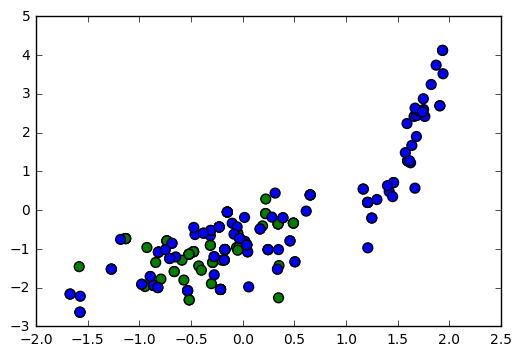

In [12]:
X, Y = get_random_sample(Ntrn, mu1, mu2, sigma1, sigma2)
random.shuffle(X)
categories = np.array(Y)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[categories])
plt.show()

***
### 2.2.3. Implement the Perceptron algorithm. Use the generated sample to learn a classifier.

In [13]:
def perceptron(valX, valY, dim):
    """
    Perceptron algorithm implementation
    """
    w = [0] * dim
    b = 0 
    
    c = list(zip(valX, valY))
    random.shuffle(c)
    valX, valY = zip(*c)   
    
    for i, j in zip(valX, valY):
        prod = (np.dot(i.T, w) + b)*j
        if prod <= 0.0:
            w = w + i*j
            b = b + j            
    return (w, b)

valw, valb = perceptron(X, Y, d)

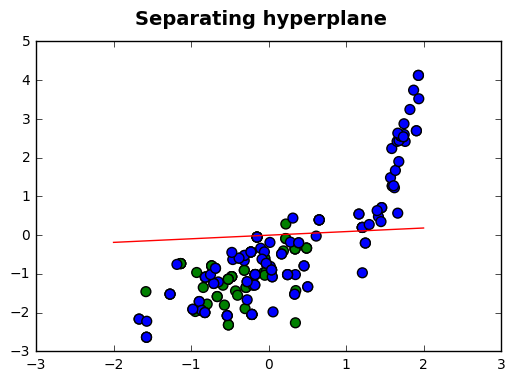

In [14]:
def fun(x):
    return -(x * valw[0]) / valw[1] - valb / valw[1]

x = np.linspace(-2, 2)
y = fun(x)

fig = plt.figure()
fig.suptitle('Separating hyperplane', fontsize=14, fontweight='bold')
plt.plot(x, y, c='r')
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[categories])
plt.show()

***
### 2.2.4. Let Ntst = 2000. Generate (Xtst, Ytst) using the same code (no need to permute). At every iteration of the perceptron algorithm, compute the current training and test error. Plot the two error curves.


In [15]:
Xtrn, Ytrn = get_random_sample(Ntrn, mu1, mu2, sigma1, sigma2) # training examples

w, b = perceptron(Xtrn, Ytrn, d) # training

Xtst, Ytst = get_random_sample(Ntst, mu1, mu2, sigma1, sigma2) # testing examples

# Testing
def predict(valX, w_value, b_value):
    
    Y_pred = []
    
    for i in valX:
        prod = np.dot(i.T, w_value) + b_value
        if prod <= 0.0:
            Y_pred.append(-1)
        else:
            Y_pred.append(1)
    
    return Y_pred

Y_pred_tst = predict(Xtst, w, b)
accuracy_tst = np.count_nonzero(abs(np.asarray(Y_pred_tst) + Ytst)) / Ytst.shape[0]
Y_pred_trn = predict(Xtrn, w, b)
accuracy_trn = np.count_nonzero(abs(np.asarray(Y_pred_trn) + Ytrn)) / Ytrn.shape[0]

print("Training accuracy: {}".format(accuracy_trn))
print("Testing accuracy: {}".format(accuracy_tst))

Training accuracy: 0.98
Testing accuracy: 0.97175


***
### 2.3. Model selection.


#### 2.3.1. Let d = 10, Ntrn = 100, Nval = 100, Ntst = 2000. Generate the train/val/test samples using the code above. You may want to adjust mu1/2 and S1/2 later if the learning problem turns out to be too easy (zero test error) or too difficult (close to random performance).


In [16]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

np.random.seed(25)
d = 10
Ntrn = 100
Nval = 100
Ntst = 2000

Xtrn, Ytrn = get_random_sample(Ntrn, mu1, mu2, sigma1, sigma2)
random.shuffle(Xtrn)
Xtst, Ytst = get_random_sample(Ntst, mu1, mu2, sigma1, sigma2)

In [17]:
clf = svm.SVC(kernel='linear')
clf.fit(Xtrn, Ytrn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

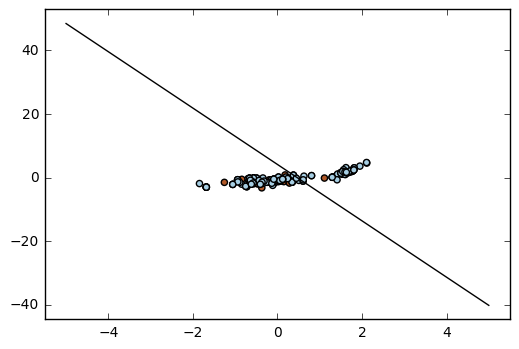

In [19]:
plt.plot(xx, yy, 'k-')

plt.scatter(Xtrn[:, 0], Xtrn[:, 1], c=Ytrn, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

***
### Cross-validation for SVM

In [20]:
n_folds = 10
cv = StratifiedKFold(n_folds)
Cs = np.power(2, np.arange(8.0, 16.0))
kernels = ['rbf']
gammas = np.power(2, np.arange(-7.0, -2.0))

svc = SVC()
gscv = GridSearchCV(estimator=svc, param_grid=dict(C=Cs, kernel=kernels, gamma=gammas),
                    n_jobs=1, cv=list(cv.split(Xtrn, Ytrn)), verbose=2)
gscv.fit(Xtrn, Ytrn)
best_params = gscv.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] ............. kernel=rbf, C=256.0, gamma=0.0078125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0078125 ............................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] kernel=rbf, C=256.0, gamma=0.0625 ...............................
[CV] ................ kernel=rbf, C=256.0, gamma=0.0625, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0625 ...............................
[CV] ................ kernel=rbf, C=256.0, gamma=0.0625, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0625 ...............................
[CV] ................ kernel=rbf, C=256.0, gamma=0.0625, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0625 ...............................
[CV] ................ kernel=rbf, C=256.0, gamma=0.0625, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.0625 ...............................
[CV] ................ kernel=rbf, C=256.0, gamma=0.0625, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.125 ................................
[CV] ................. kernel=rbf, C=256.0, gamma=0.125, total=   0.0s
[CV] kernel=rbf, C=256.0, gamma=0.125 ................................
[CV] ................. kernel=rbf, C=256.0, gamma=0.125, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.5s finished


In [21]:
Y_pred = gscv.predict(Xtst)
print('Best CV accuracy: %g\nBest params: %s\n' % (gscv.best_score_, gscv.best_params_))

Best CV accuracy: 0.69
Best params: {'kernel': 'rbf', 'C': 256.0, 'gamma': 0.015625}



*** 
### Comparison of different SVM classifiers

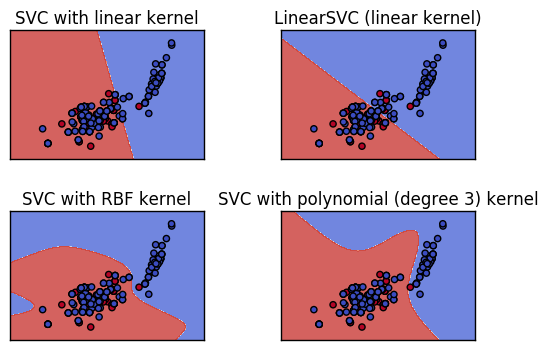

In [22]:
h = .02

C = 1.0

# Different kernels
svc = svm.SVC(kernel='linear', C=C).fit(Xtrn, Ytrn)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrn, Ytrn)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(Xtrn, Ytrn)
lin_svc = svm.LinearSVC(C=C).fit(Xtrn, Ytrn)

# create a mesh to plot in
x_min, x_max = Xtrn[:, 0].min() - 1, Xtrn[:, 0].max() + 1
y_min, y_max = Xtrn[:, 1].min() - 1, Xtrn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrn[:, 0], Xtrn[:, 1], c=Ytrn, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
